In [45]:
data clearning;
input time response_number;
datalines;
   77.0   16.0
   70.0   14.0
   85.0   22.0
   50.0   10.0
   62.0   14.0
   70.0   17.0
   55.0   10.0
   63.0   13.0
   88.0   19.0
   57.0   12.0
   81.0   18.0
   51.0   11.0
  ;
  run;



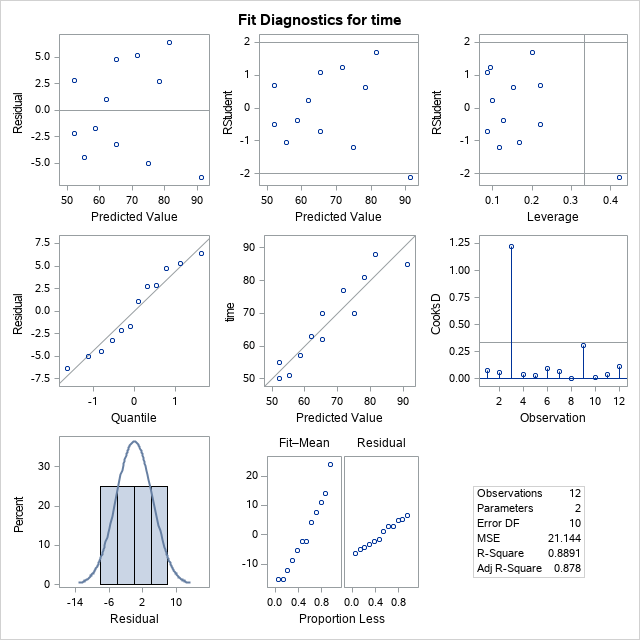
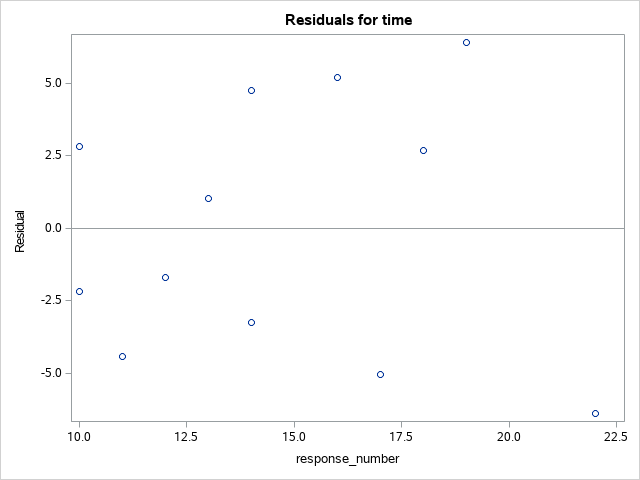
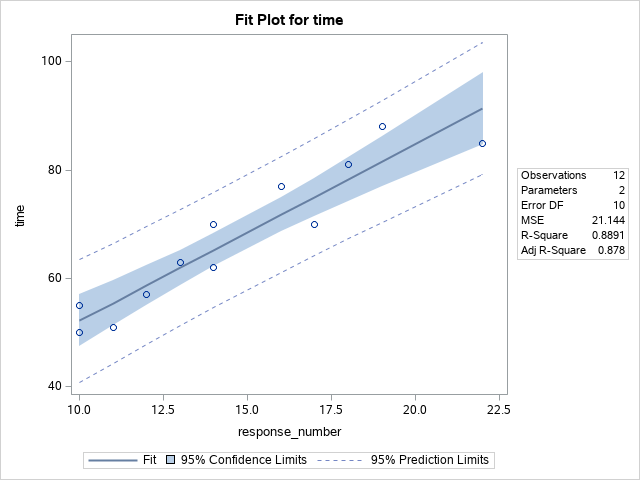

In [54]:
proc reg data=clearning;
 model time = response_number;
 output out=result r=residual;
run;

In [55]:
data residual; 
set result;
  abs_residual = abs(residual);
run;

In [56]:
proc print data=residual(obs=10);
run;

Obs,time,response_number,residual,abs_residual
1,77,16,5.22479,5.22479
2,70,14,4.76261,4.76261
3,85,22,-6.38866,6.38866
4,50,10,-2.16176,2.16176
5,62,14,-3.23739,3.23739
6,70,17,-5.04412,5.04412
7,55,10,2.83824,2.83824
8,63,13,1.03151,1.03151
9,88,19,6.41807,6.41807
10,57,12,-1.69958,1.69958



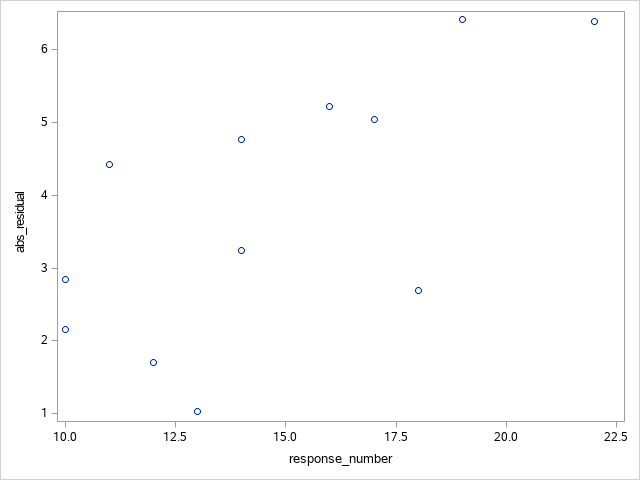

In [57]:
proc sgplot data=residual;
  scatter x= response_number y=abs_residual;
run;


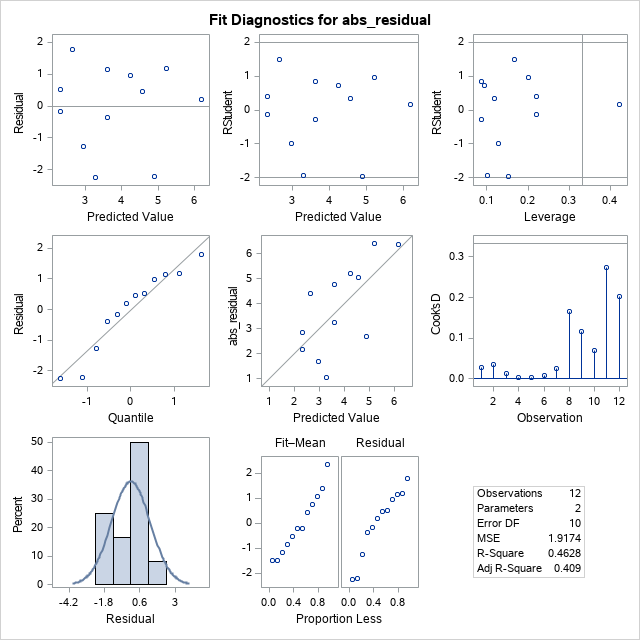
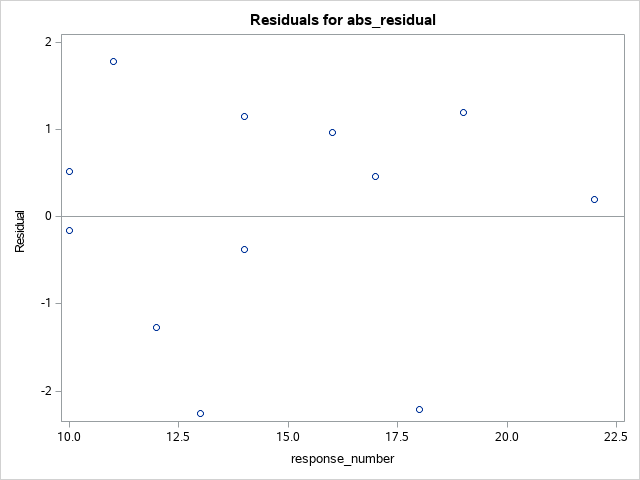
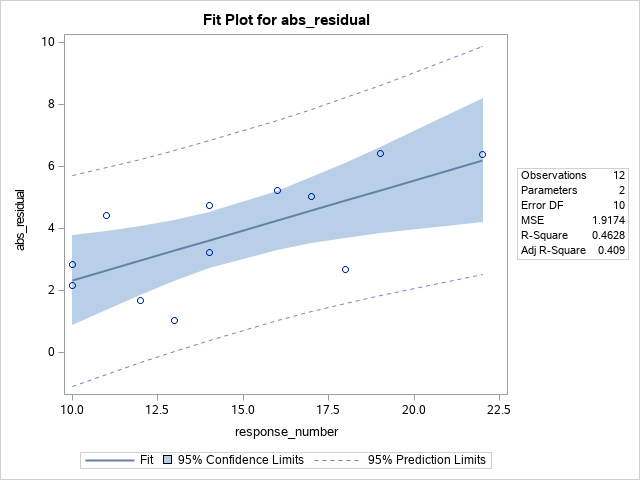

In [61]:
proc reg data=residual;
model abs_residual = response_number;
output out=sdresult p=predicted;
run;

In [64]:
data sdresult2;
set sdresult;
weight=predicted**(-2);
proc print data=sdresult2;
run;

Obs,time,response_number,residual,abs_residual,predicted,weight
1,77,16,5.22479,5.22479,4.25720,0.05518
2,70,14,4.76261,4.76261,3.61194,0.07665
3,85,22,-6.38866,6.38866,6.19298,0.02607
4,50,10,-2.16176,2.16176,2.32143,0.18556
5,62,14,-3.23739,3.23739,3.61194,0.07665
6,70,17,-5.04412,5.04412,4.57983,0.04768
7,55,10,2.83824,2.83824,2.32143,0.18556
8,63,13,1.03151,1.03151,3.28932,0.09242
9,88,19,6.41807,6.41807,5.22509,0.03663
10,57,12,-1.69958,1.69958,2.96669,0.11362



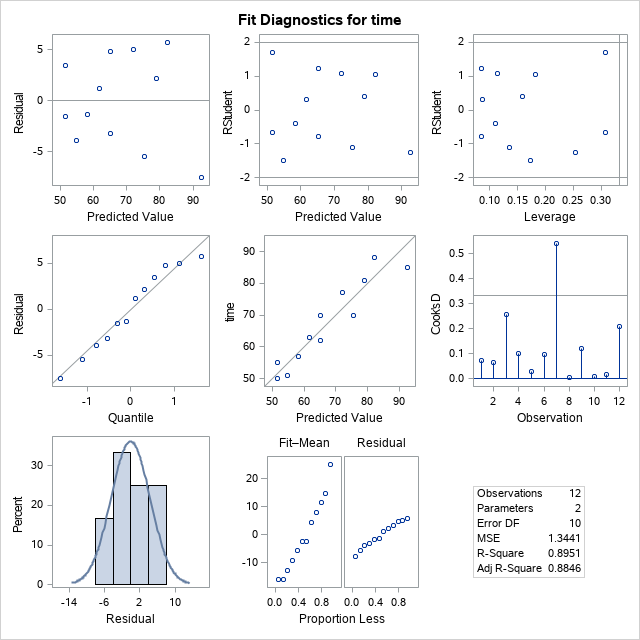
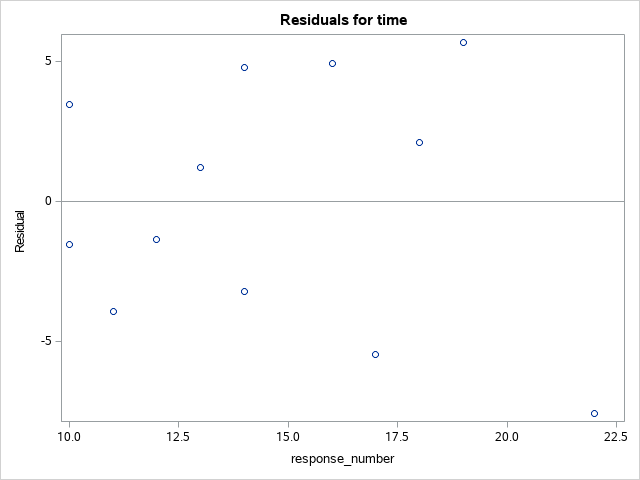
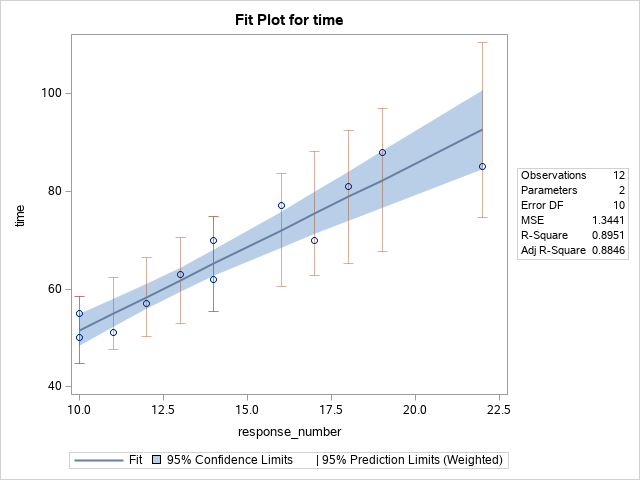

In [67]:
proc reg data=sdresult2;
model time = response_number/clb;
weight weight;
output out=wresults r=residual;
run;

In [80]:
data wresults2;
set wresults;
abs_residual = abs(residual);
run;


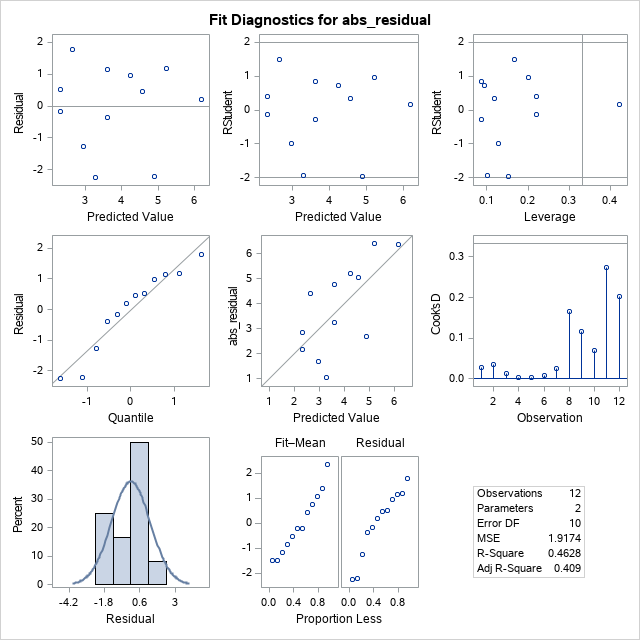
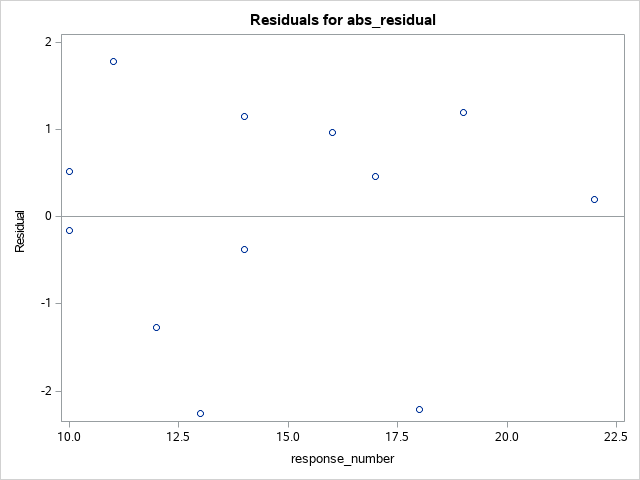
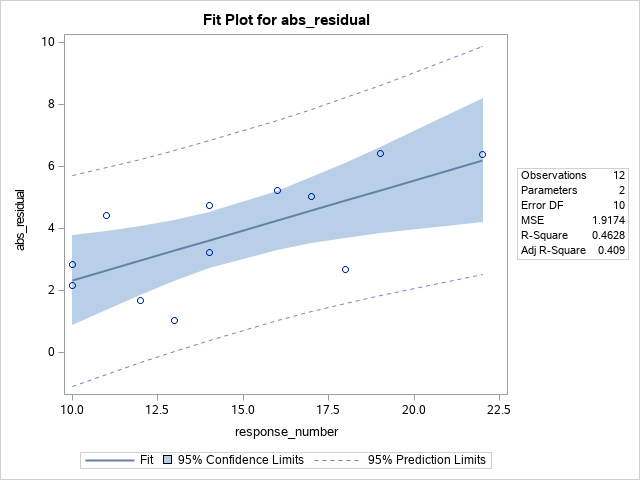

In [82]:
proc reg data=wresults2;
model abs_residual = response_number;
output out=wsdresult p=predicted;
run;

In [84]:
data wsdresult2;
set wsdresult;
weight2=predicted**(-2);
run;


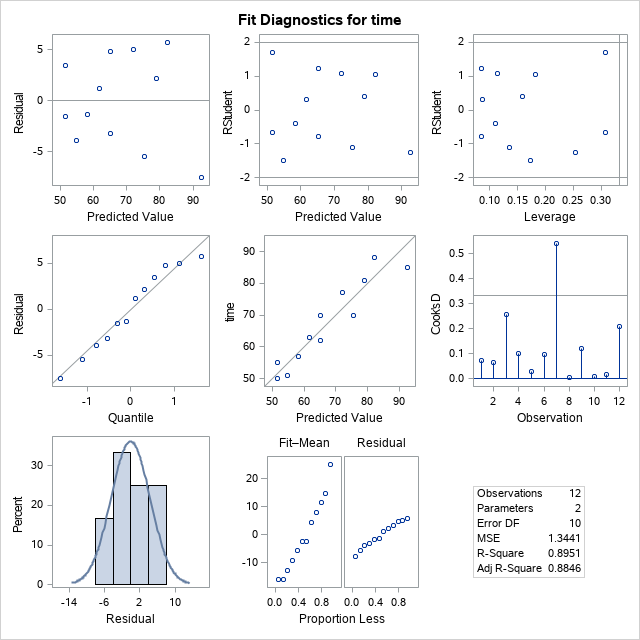
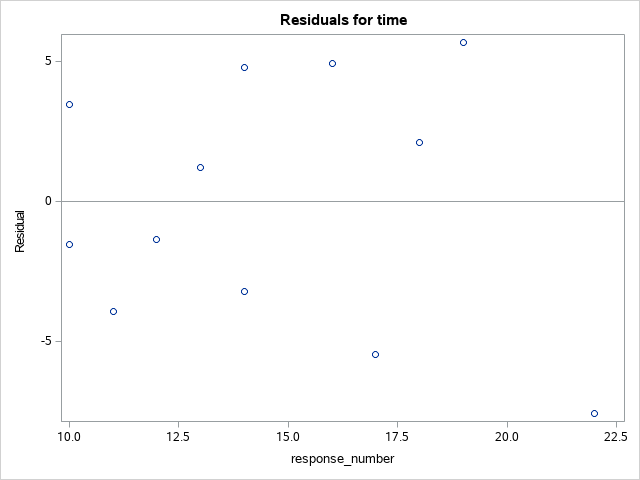
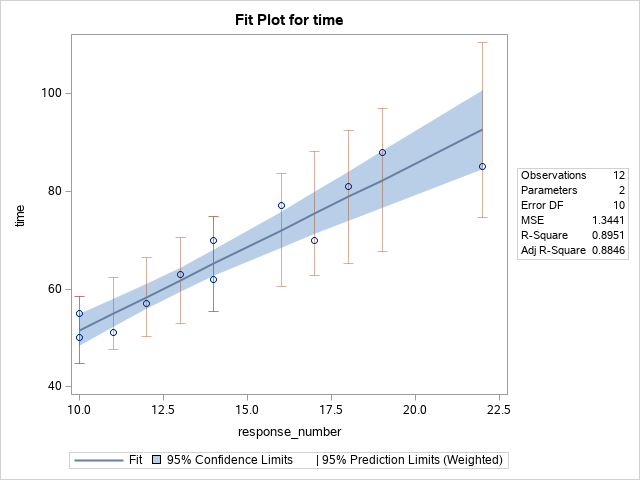

In [85]:
proc reg data=wsdresult2;
model time = response_number/clb;
weight weight2;
run;


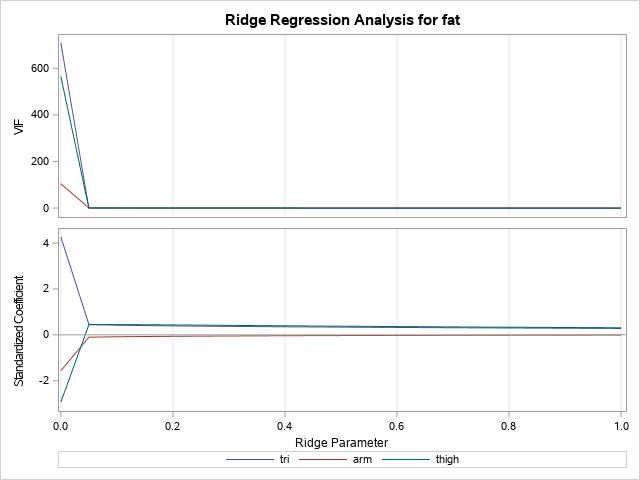
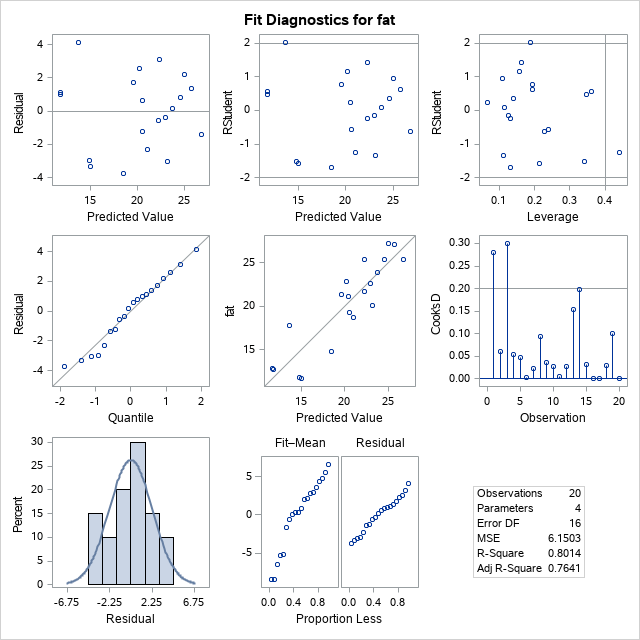
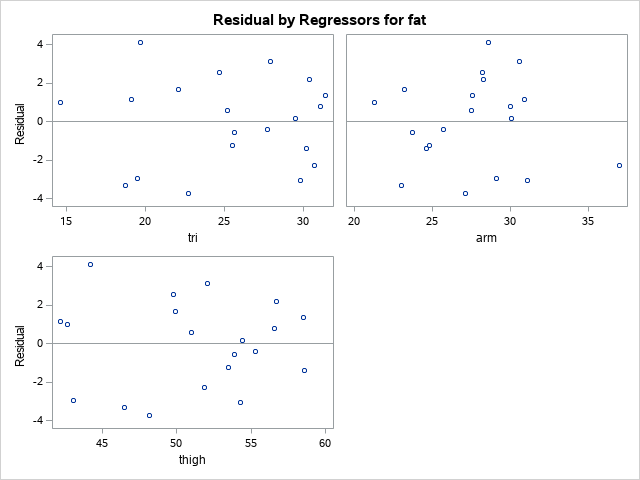

In [79]:
proc reg data=body outvif 
            outest=RidgeOut ridge=0 to 1 by .05 ;
      model fat=tri arm thigh/; 
run;

In [1]:
data cement;
input Y X1 X2 X3 X4;
datalines;
78.5 7 26 6 60
74.3 1 29 15 52
104.3 11 56 8 20
87.6 11 31 8 47
95.9 7 52 6 33
109.2 11 55 9 22
102.7 3 71 17 6
72.5 1 31 22 44
93.1 2 54 18 22
115.9 21 47 4 26
83.8 1 40 23 34
113.3 11 66 9 12
109.4 10 68 8 12
;
run;


SAS Connection established. Subprocess id is 16411




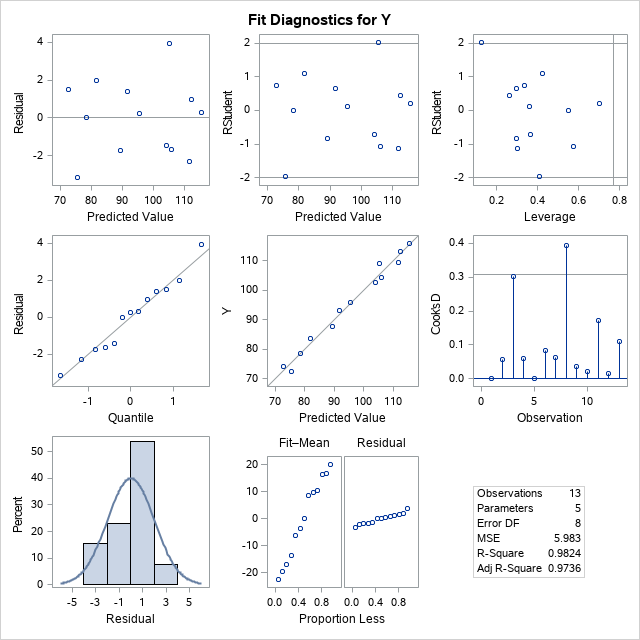
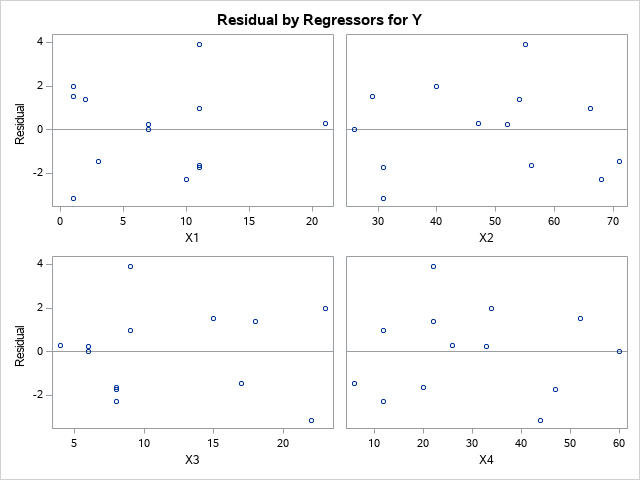

In [87]:
proc reg data=cement;
model Y=X1 X2 X3 X4;
run;


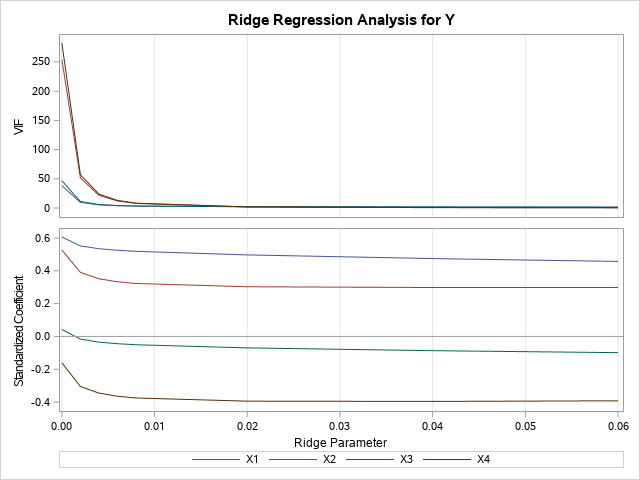
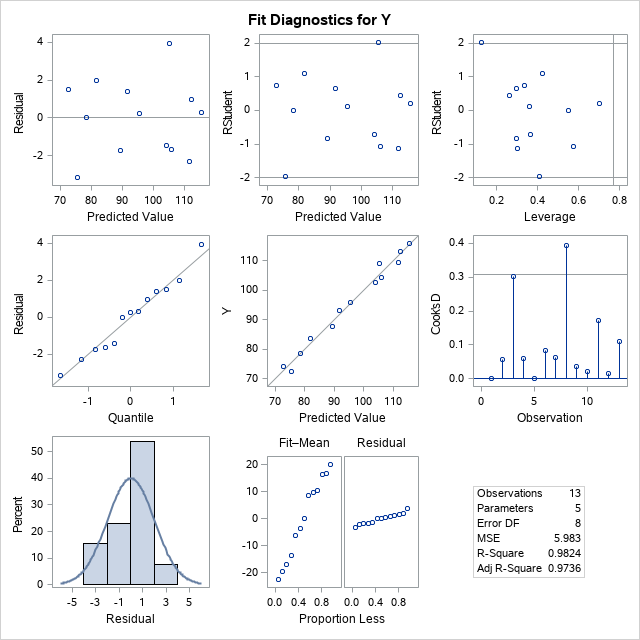
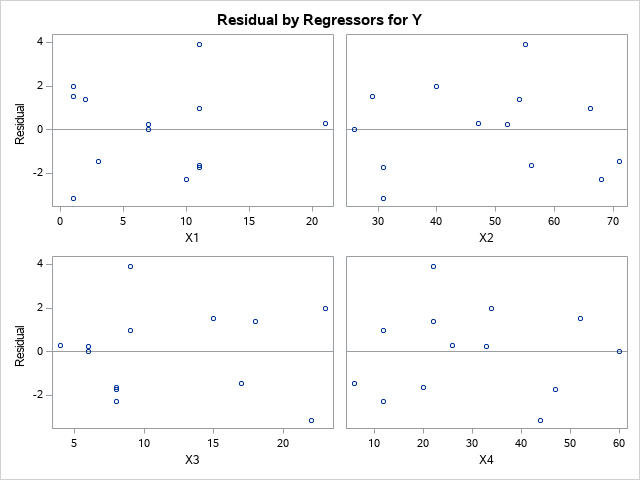

In [2]:
proc reg data=cement outest=RidgeOut outvif ridge=0.000 0.002 0.004 0.006 0.008 0.02 0.04 0.06;
      model Y=X1 X2 X3 X4 ; 
run;

In [96]:
proc print data=Ridgeout;
run;

Obs,_MODEL_,_TYPE_,_DEPVAR_,_RIDGE_,_PCOMIT_,_RMSE_,Intercept,X1,X2,X3,X4,Y
1,MODEL1,PARMS,Y,.,.,2.44601,62.4054,1.5511,0.510,0.1019,-0.144,-1
2,MODEL1,RIDGEVIF,Y,0.000,.,.,.,38.4962,254.423,46.8684,282.513,-1
3,MODEL1,RIDGE,Y,0.000,.,2.44601,62.4054,1.5511,0.510,0.1019,-0.144,-1
4,MODEL1,RIDGEVIF,Y,0.002,.,.,.,9.8437,51.695,11.3463,57.092,-1
5,MODEL1,RIDGE,Y,0.002,.,2.45136,75.3258,1.4128,0.378,-0.0374,-0.273,-1
6,MODEL1,RIDGEVIF,Y,0.004,.,.,.,5.5915,21.903,6.0893,23.971,-1
7,MODEL1,RIDGE,Y,0.004,.,2.45531,79.0840,1.3686,0.340,-0.0806,-0.310,-1
8,MODEL1,RIDGEVIF,Y,0.006,.,.,.,4.1825,12.253,4.3586,13.248,-1
9,MODEL1,RIDGE,Y,0.006,.,2.45812,80.8902,1.3444,0.323,-0.1032,-0.327,-1
10,MODEL1,RIDGEVIF,Y,0.008,.,.,.,3.5304,7.956,3.5661,8.478,-1


In [3]:
data Ridgeout2;
set Ridgeout;
R2 = 1-((_RMSE_**2)*8/2715.76);
run;

In [4]:
proc print data=Ridgeout2;
run;

Obs,_MODEL_,_TYPE_,_DEPVAR_,_RIDGE_,_PCOMIT_,_RMSE_,Intercept,X1,X2,X3,X4,Y,R2
1,MODEL1,PARMS,Y,.,.,2.44601,62.4054,1.5511,0.510,0.1019,-0.144,-1,0.98238
2,MODEL1,RIDGEVIF,Y,0.000,.,.,.,38.4962,254.423,46.8684,282.513,-1,.
3,MODEL1,RIDGE,Y,0.000,.,2.44601,62.4054,1.5511,0.510,0.1019,-0.144,-1,0.98238
4,MODEL1,RIDGEVIF,Y,0.002,.,.,.,9.8437,51.695,11.3463,57.092,-1,.
5,MODEL1,RIDGE,Y,0.002,.,2.45136,75.3258,1.4128,0.378,-0.0374,-0.273,-1,0.98230
6,MODEL1,RIDGEVIF,Y,0.004,.,.,.,5.5915,21.903,6.0893,23.971,-1,.
7,MODEL1,RIDGE,Y,0.004,.,2.45531,79.0840,1.3686,0.340,-0.0806,-0.310,-1,0.98224
8,MODEL1,RIDGEVIF,Y,0.006,.,.,.,4.1825,12.253,4.3586,13.248,-1,.
9,MODEL1,RIDGE,Y,0.006,.,2.45812,80.8902,1.3444,0.323,-0.1032,-0.327,-1,0.98220
10,MODEL1,RIDGEVIF,Y,0.008,.,.,.,3.5304,7.956,3.5661,8.478,-1,.



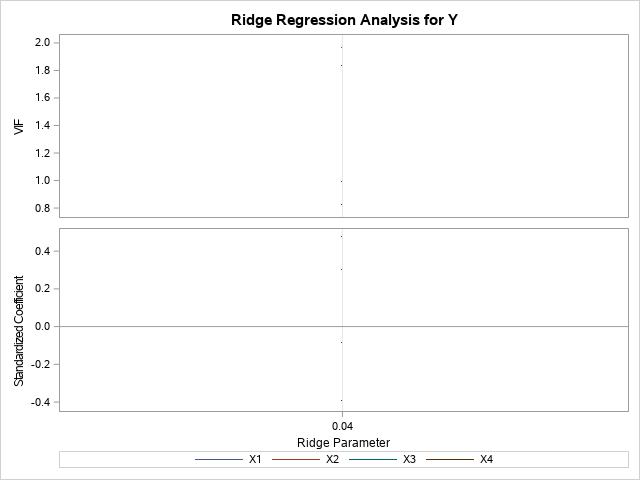
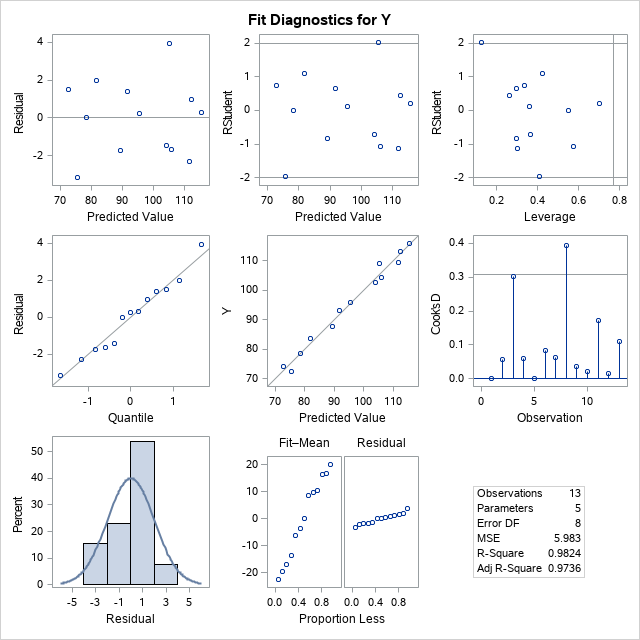
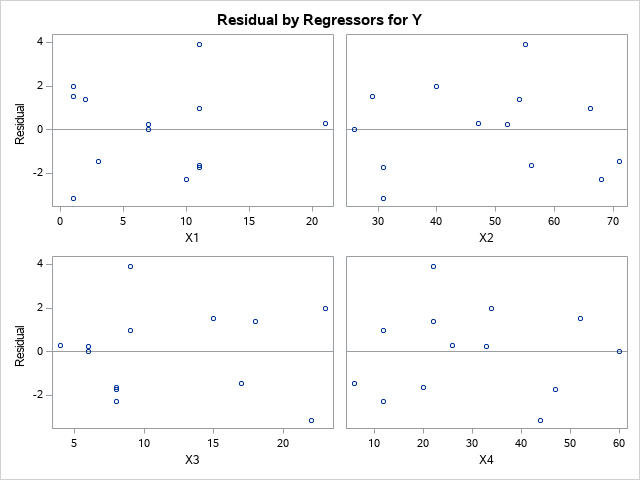

In [7]:
proc reg data=cement outest=Finalput;
      model Y=X1 X2 X3 X4 /Ridge=0.04 outseb; 
run;

In [8]:
proc print data=Finalput;
run;

Obs,_MODEL_,_TYPE_,_DEPVAR_,_RIDGE_,_PCOMIT_,_RMSE_,Intercept,X1,X2,X3,X4,Y
1,MODEL1,PARMS,Y,.,.,2.44601,62.4054,1.55110,0.51017,0.10191,-0.14406,-1
2,MODEL1,SEB,Y,.,.,2.44601,70.0710,0.74477,0.72379,0.75471,0.70905,-1
3,MODEL1,RIDGE,Y,0.04,.,2.51829,85.5145,1.21511,0.28868,-0.20287,-0.35571,-1
4,MODEL1,RIDGESEB,Y,0.04,.,2.51829,3.1200,0.17332,0.04639,0.15367,0.03934,-1


In [10]:
proc means data=cement;
run;

Variable,N,Mean,Std Dev,Minimum,Maximum
Y X1 X2 X3 X4,13 13 13 13 13,95.4230769 7.4615385 48.1538462 11.7692308 30.0000000,15.0437226 5.8823944 15.5608813 6.4051262 16.7381799,72.5000000 1.0000000 26.0000000 4.0000000 6.0000000,115.9000000 21.0000000 71.0000000 23.0000000 60.0000000
